In [32]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr
from datetime import date

In [43]:
before = pd.read_excel("機構住民測驗題前測_202311060056_654839ca1368a.xlsx", sheet_name="前測", usecols=['編號:', 'Unnamed: 119', '1.1 出生年月：'])
before.rename(columns={'編號:': 'ID', 'Unnamed: 119': '前測', '1.1 出生年月：':'出生'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生'])
before['年齡'] = before['出生'].apply(lambda x:date.today().year - x.year)
before.drop_duplicates(inplace=True)
print(before)

    ID         出生  前測  年齡
0    1 1942-11-13  38  81
1    2 1963-10-07  38  60
2    6 1957-01-09  37  66
3    7 1935-05-17  38  88
4    8 1952-04-18  38  71
5    9 1935-05-07  38  88
6   10 1933-09-14  38  90
7   11 1930-09-02  38  93
8   12 1942-09-24  38  81
9   13 1943-04-08  38  80
10  14 1960-09-03  38  63
11  15 1971-03-24  38  52
12  16 1951-04-26  38  72
13  17 1956-06-29  38  67
14  18 1951-03-24  38  72
15  19 1955-08-12  38  68
16  20 1953-02-05  38  70
17  21 1956-09-25  38  67
18  22 1954-06-10  38  69
19  23 1937-05-06  38  86
20  24 1957-10-09  38  66
21  25 1937-07-05  38  86
22  26 1943-06-10  38  80
23  27 1938-12-25  38  85


In [44]:
after = pd.read_excel("機構住民測驗題前測_202311060056_654839ca1368a.xlsx", sheet_name="後測", usecols=['編號:', 'Unnamed: 51'])
after.rename(columns={'編號:': 'ID', 'Unnamed: 51': '後測'}, inplace=True)
print(after)

    ID  後測
0    7  38
1    9  38
2   10  38
3   11  38
4   12  38
5   13  38
6   14  38
7   15  38
8   16  37
9   17  38
10  18  38
11  19  38
12  20  38
13  21  38
14  22  38
15  23  38
16  24  38
17  25  38
18  26  38
19  27  38


In [45]:
df = pd.merge(before, after, on='ID')
df

,ID,出生,前測,年齡,後測
0,7,1935-05-17,38,88,38
1,9,1935-05-07,38,88,38
2,10,1933-09-14,38,90,38
3,11,1930-09-02,38,93,38
4,12,1942-09-24,38,81,38
5,13,1943-04-08,38,80,38
6,14,1960-09-03,38,63,38
7,15,1971-03-24,38,52,38
8,16,1951-04-26,38,72,37
9,17,1956-06-29,38,67,38


In [19]:
df.to_excel('機構住戶.xlsx')

In [12]:
print(df['前測'].describe())
print('='*20)
print(df['後測'].describe())

count    20.0
mean     38.0
std       0.0
min      38.0
25%      38.0
50%      38.0
75%      38.0
max      38.0
Name: 前測, dtype: float64
count    20.000000
mean     37.950000
std       0.223607
min      37.000000
25%      38.000000
50%      38.000000
75%      38.000000
max      38.000000
Name: 後測, dtype: float64


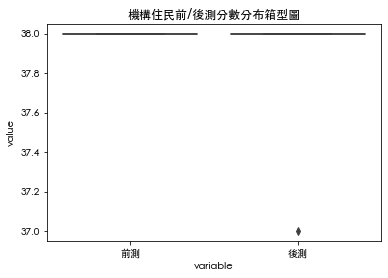

In [13]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("機構住民前/後測分數分布箱型圖")
plt.show()

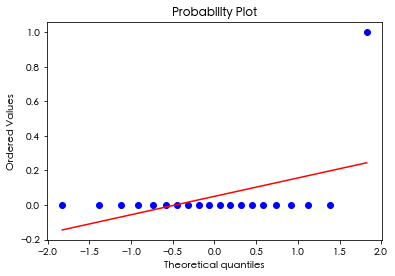

In [14]:
df['差值'] = df['前測'] - df['後測']
measurements = df['差值']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [15]:
shapiro(df['差值'])

ShapiroResult(statistic=0.2358737587928772, pvalue=2.6930604413166748e-09)

In [16]:
aa = np.mean(df['前測'])  
print('A方法均值:',aa)
bb = np.mean(df['後測'])  
print('B方法均值:',bb) 
junzhicha = aa - bb  
print('均值差:',junzhicha)

A方法均值: 38.0
B方法均值: 37.95
均值差: 0.04999999999999716


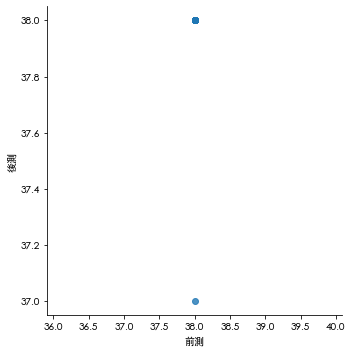

In [17]:
sns.lmplot(y='後測', x = '前測',data=df)
plt.show()

In [18]:
r = pearsonr(df['前測'], df['後測'])
print("pearson系数：",r[0])
print("P-Value：",r[1])

pearson系数： nan
P-Value： nan


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [31]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試 雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided', mode='exact')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")

Wilcoxon statistic: 0.0
P-value: 0.31731050786291415
統計上不顯著，不能拒絕虛無假設，表示前後測無差異。


In [27]:
print("後測正確填答率為： ", df['後測'].tolist().count(38)/len(df['後測'].tolist())*100, "%")

後測正確填答率為：  95.0 %


In [46]:
print(df['年齡'].max())
print(df['年齡'].min())

93
52
